In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import time
import math
import random
import pandas as pd
import matplotlib.image as img
import matplotlib as mpl
import numpy as np
from skimage import io
from random import sample

In [4]:
DATASET_SAMPLE_PATH = './DataSet/SAMPLE/'

def create_df_from_images(ds_path):
    
    files = os.scandir(ds_path)
    train = pd.DataFrame(columns=['file_name','image','nbfinger','hand'])

    for idx,file in enumerate(files):
        if not file.name.startswith('.') and file.is_file() and file.name.endswith('.png'):
            fname = file.name
            complete_fname = os.path.join(ds_path,fname)
            root,ext = os.path.splitext(fname)
            image = io.imread(complete_fname)
            flat_image = image.flatten()
            train.loc[idx,'file_name'] = fname
            train.loc[idx,'image'] = flat_image
            train.loc[idx,'nbfinger'] = root[-2:-1]
            train.loc[idx,'hand'] = root[-1:]
            
    train['nbfinger'] = train['nbfinger'].astype('category')
    train['hand'] = train['hand'].astype('category')
    return train

t1 = time.time()
sample = create_df_from_images(DATASET_SAMPLE_PATH)
t2 = time.time()
print('dataset created in %.2f seconds' %(t2 - t1))

dataset created in 0.48 seconds


In [5]:
sample.loc[0,'image']

array([52, 53, 56, ..., 48, 48, 48], dtype=uint8)

file_name          0ab57b07-11e8-48d9-a36f-56f689a22c69_5R.png
image        [51, 51, 49, 48, 50, 49, 47, 46, 46, 47, 49, 5...
nbfinger                                                     5
hand                                                         R
Name: 69, dtype: object


array([51, 51, 49, ..., 35, 34, 33], dtype=uint8)

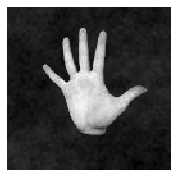

In [6]:
def plot_image(image):
    size = int(math.sqrt(len(image)))
    image_view = image.reshape(size,size)
    plt.imshow(image_view, cmap = mpl.cm.gray);
    plt.axis("off")

randidx = random.randint(0,len(sample))
image = sample.loc[randidx,'image']
print(sample.loc[randidx,:])
plt.figure(figsize=(3,3))
plot_image(image)

image

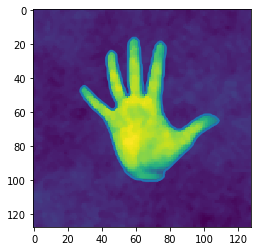

In [8]:
from skimage import measure
from skimage import filters

image_view = image.reshape(128,128)
image_view =filters.median(image_view)

contours = measure.find_contours(image_view, 70)

plt.imshow(image_view, interpolation='nearest')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()

In [9]:
import skimage

image64 = skimage.transform.resize(sobel, (64, 64))

plt.imshow(image64)

NameError: name 'sobel' is not defined

0.46608342198323155
[0. 0. 0. ... 0. 0. 0.]


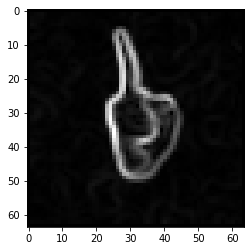

In [78]:
from skimage import filters
from skimage import transform

def plot_image(image):
    size = int(math.sqrt(len(image)))
    image_view = image.reshape(size,size)
    plt.imshow(image_view, cmap = mpl.cm.gray);
#     plt.axis("off")
    
def preprocess_image(image_flat):
    image_view = image_flat.reshape(128,128)
    image_resize = transform.resize(image_view, (64, 64),anti_aliasing=True)
    filtered_image = filters.median(image_resize)
    sobel = filters.sobel(filtered_image)
    final_image = sobel.flatten()
    return final_image


randidx = random.randint(0,len(sample))
image = sample.loc[randidx,'image']
image64 = preprocess_image(image)
plot_image(image64)
print(image64.max())
print(image64)

In [79]:
from skimage import io

mypath='./Image_to_predict/try_to_find.png'
myimage = io.imread(mypath,as_gray=True)

myimage

array([[ 9, 10, 11, ..., 72, 71, 70],
       [ 7,  7,  7, ..., 75, 74, 73],
       [ 8,  8,  7, ..., 78, 76, 75],
       ...,
       [54, 48, 44, ..., 45, 45, 46],
       [67, 58, 44, ..., 43, 43, 43],
       [62, 55, 44, ..., 41, 40, 40]], dtype=uint8)

In [196]:
from skimage import io

mypath='./DATASET/SAMPLE/000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png'
myimage2 = io.imread(mypath)

myimage2

array([[52, 53, 56, ..., 49, 48, 48],
       [55, 55, 55, ..., 49, 51, 52],
       [61, 59, 54, ..., 48, 55, 58],
       ...,
       [44, 44, 46, ..., 46, 48, 49],
       [42, 42, 44, ..., 47, 48, 49],
       [41, 41, 42, ..., 48, 48, 48]], dtype=uint8)

array([0., 0., 0., ..., 0., 0., 0.])

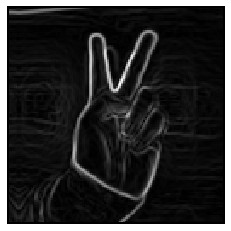

In [186]:
image64 = preprocess_image(myimage.flatten())
plot_image(image64)

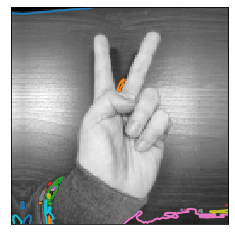

In [177]:
from skimage import measure

image_view = myimage.flatten().reshape(128,128)

contours = measure.find_contours(image_view, 50)

plt.imshow(image_view, interpolation='nearest')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.axis('image')
plt.xticks([])
plt.yticks([])
plt.show()
